<a href="https://www.kaggle.com/code/sadimrahmanbadhan/risk-of-stroke-detection-ann?scriptVersionId=222752137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from ydata_profiling import ProfileReport
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Source: [Source](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)

In [2]:
# Read CSV
path = "/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv"
df = pd.read_csv(path)

# Shape
rows,columns = df.shape
print(f"[i] Shape: {rows},{columns}")

# Columns 
print(f"[i] Length: {rows}")
print(f"Columns\n{'-' * 15}")
for column in df.columns:
    print(column)

[i] Shape: 246022,40
[i] Length: 246022
Columns
---------------
State
Sex
GeneralHealth
PhysicalHealthDays
MentalHealthDays
LastCheckupTime
PhysicalActivities
SleepHours
RemovedTeeth
HadHeartAttack
HadAngina
HadStroke
HadAsthma
HadSkinCancer
HadCOPD
HadDepressiveDisorder
HadKidneyDisease
HadArthritis
HadDiabetes
DeafOrHardOfHearing
BlindOrVisionDifficulty
DifficultyConcentrating
DifficultyWalking
DifficultyDressingBathing
DifficultyErrands
SmokerStatus
ECigaretteUsage
ChestScan
RaceEthnicityCategory
AgeCategory
HeightInMeters
WeightInKilograms
BMI
AlcoholDrinkers
HIVTesting
FluVaxLast12
PneumoVaxEver
TetanusLast10Tdap
HighRiskLastYear
CovidPos


In [3]:
# Print First few data
df.head().T

,0,1,2,3,4
State,Alabama,Alabama,Alabama,Alabama,Alabama
Sex,Female,Male,Male,Female,Female
GeneralHealth,Very good,Very good,Very good,Fair,Good
PhysicalHealthDays,4.0,0.0,0.0,5.0,3.0
MentalHealthDays,0.0,0.0,0.0,0.0,15.0
LastCheckupTime,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...
PhysicalActivities,Yes,Yes,No,Yes,Yes
SleepHours,9.0,6.0,8.0,9.0,5.0
RemovedTeeth,None of them,None of them,"6 or more, but not all",None of them,1 to 5
HadHeartAttack,No,No,No,No,No


In [4]:
df.shape

(246022, 40)

In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [6]:
# Describe 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


In [7]:
# Describe - Categorical
df.describe(include="object").T

,count,unique,top,freq
State,246022,54,Washington,15000
Sex,246022,2,Female,127811
GeneralHealth,246022,5,Very good,86999
LastCheckupTime,246022,4,Within past year (anytime less than 12 months ...,198153
PhysicalActivities,246022,2,Yes,191318
RemovedTeeth,246022,4,None of them,131592
HadHeartAttack,246022,2,No,232587
HadAngina,246022,2,No,231069
HadStroke,246022,2,No,235910
HadAsthma,246022,2,No,209493


In [8]:
# Unique Values
for column in df.columns:
    print(f"{column}'s Unique Value")
    print("=" * 45)
    print(df[column].unique())
    print()

State's Unique Value
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Sex's Unique Value
['Female' 'Male']

GeneralHealth's Unique Value
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

PhysicalHealthDays's Unique Value
[ 4.  0.  5.  3.  2. 25. 30. 15. 29.  8. 16. 20. 10.  9.  7.  1. 21.  6.
 27. 14. 12. 11. 13. 28. 17. 23. 24. 26. 18. 22. 19.]

MentalHealthDays's Unique Value
[ 0. 15.  4. 25.  5. 30. 

array([[<Axes: title={'center': 'PhysicalHealthDays'}>,
        <Axes: title={'center': 'MentalHealthDays'}>],
       [<Axes: title={'center': 'SleepHours'}>,
        <Axes: title={'center': 'HeightInMeters'}>],
       [<Axes: title={'center': 'WeightInKilograms'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

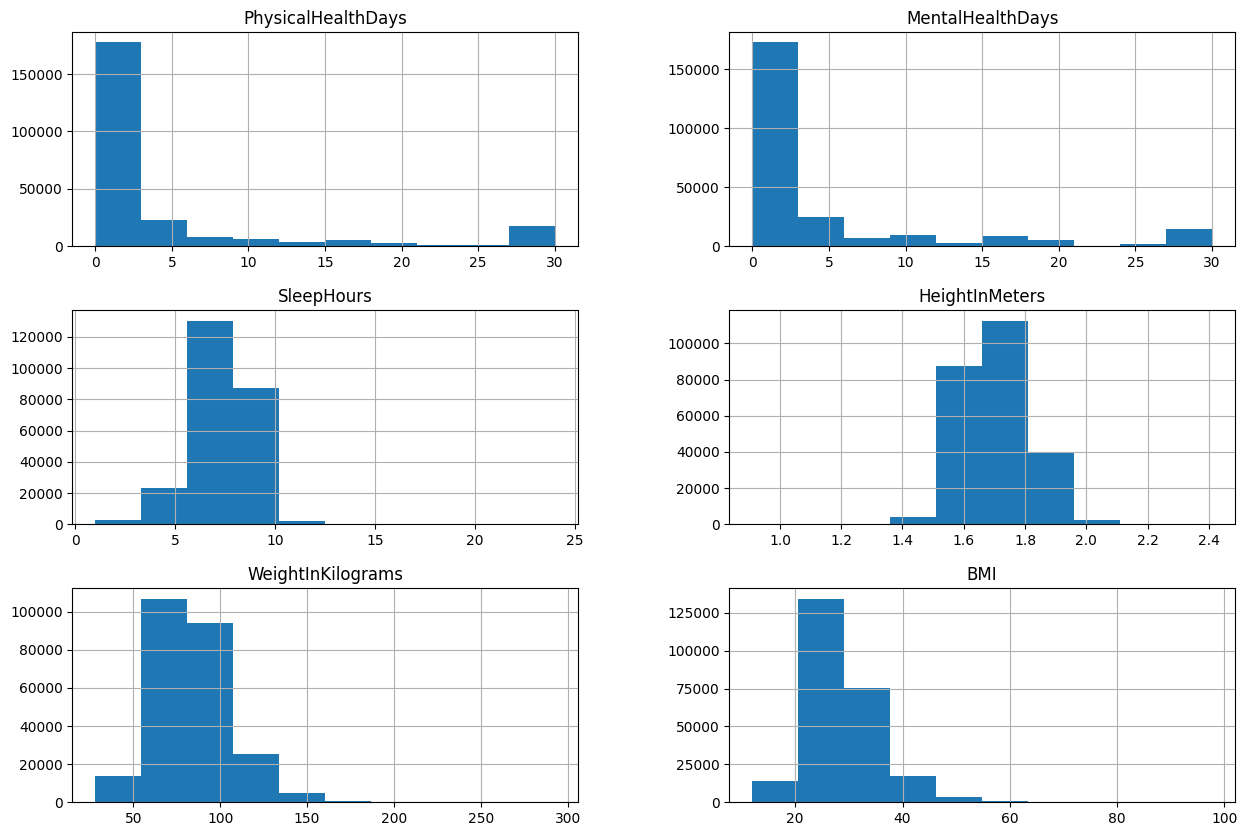

In [9]:
# Distribution
df.hist(figsize=(15,10))

In [10]:
# Missing Values
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

## Question: Does the person with [specified features/factors] has heart disease?
### Label: Heart Disease
### Outcome: Yes | No 

# Key Factors of Heart Disease according to medical science
- High Blood Pressure
- High Cholesterol
- Smoking
- Diabetes
- Obesity
- Inactive Lifestyle
- Alcohol Intake


### Source: [Link](http://https://www.cdc.gov/heartdisease/risk_factors.htm)

# Dataset Preparation

In [11]:
df = df[[
    "Sex",
    "AgeCategory",
    "HeightInMeters",
    "WeightInKilograms",
    "BMI",
    "SleepHours",
    "HadStroke",
    "HadDiabetes",
    "SmokerStatus",
    "ECigaretteUsage",
    "AlcoholDrinkers",
    "HadHeartAttack"
]]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sex                246022 non-null  object 
 1   AgeCategory        246022 non-null  object 
 2   HeightInMeters     246022 non-null  float64
 3   WeightInKilograms  246022 non-null  float64
 4   BMI                246022 non-null  float64
 5   SleepHours         246022 non-null  float64
 6   HadStroke          246022 non-null  object 
 7   HadDiabetes        246022 non-null  object 
 8   SmokerStatus       246022 non-null  object 
 9   ECigaretteUsage    246022 non-null  object 
 10  AlcoholDrinkers    246022 non-null  object 
 11  HadHeartAttack     246022 non-null  object 
dtypes: float64(4), object(8)
memory usage: 22.5+ MB


In [13]:
## Drop duplicates
df = df.drop_duplicates()
## Reset Index
df = df.reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192705 entries, 0 to 192704
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Sex                192705 non-null  object 
 1   AgeCategory        192705 non-null  object 
 2   HeightInMeters     192705 non-null  float64
 3   WeightInKilograms  192705 non-null  float64
 4   BMI                192705 non-null  float64
 5   SleepHours         192705 non-null  float64
 6   HadStroke          192705 non-null  object 
 7   HadDiabetes        192705 non-null  object 
 8   SmokerStatus       192705 non-null  object 
 9   ECigaretteUsage    192705 non-null  object 
 10  AlcoholDrinkers    192705 non-null  object 
 11  HadHeartAttack     192705 non-null  object 
dtypes: float64(4), object(8)
memory usage: 17.6+ MB


In [15]:
# Categorical encoding (OHE)
label = pd.get_dummies(df["HadHeartAttack"], drop_first=True)
df1 = df.drop(["Sex", "AgeCategory", "HadStroke", "HadDiabetes", "SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers", "HadHeartAttack"], axis=1)

In [16]:
df1.head()

,HeightInMeters,WeightInKilograms,BMI,SleepHours
0,1.60,71.67,27.99,9.0
1,1.78,95.25,30.13,6.0
2,1.85,108.86,31.66,8.0
3,1.70,90.72,31.32,9.0
4,1.55,79.38,33.07,5.0


In [17]:
df = df.drop(["HadHeartAttack"], axis=1)
df2 = pd.get_dummies(df, 
        columns=["Sex", "AgeCategory", "HadStroke", "HadDiabetes", "SmokerStatus", "ECigaretteUsage", "AlcoholDrinkers"],
        drop_first=True
)

In [18]:
df2.head()

,HeightInMeters,WeightInKilograms,BMI,SleepHours,Sex_Male,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,...,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,AlcoholDrinkers_Yes
0,1.60,71.67,27.99,9.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.78,95.25,30.13,6.0,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,1.85,108.86,31.66,8.0,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1.70,90.72,31.32,9.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.55,79.38,33.07,5.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [19]:
# Add encoded categories to dataframe
df = pd.concat([df1, df2])

In [20]:
df2.head()

,HeightInMeters,WeightInKilograms,BMI,SleepHours,Sex_Male,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,...,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,AlcoholDrinkers_Yes
0,1.60,71.67,27.99,9.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.78,95.25,30.13,6.0,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
2,1.85,108.86,31.66,8.0,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1.70,90.72,31.32,9.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.55,79.38,33.07,5.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [21]:
df = pd.concat([df1, df2], axis=1)

In [22]:
df.head()

,HeightInMeters,WeightInKilograms,BMI,SleepHours,HeightInMeters,WeightInKilograms,BMI,SleepHours,Sex_Male,AgeCategory_Age 25 to 29,...,"HadDiabetes_No, pre-diabetes or borderline diabetes",HadDiabetes_Yes,"HadDiabetes_Yes, but only during pregnancy (female)",SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,AlcoholDrinkers_Yes
0,1.60,71.67,27.99,9.0,1.60,71.67,27.99,9.0,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1.78,95.25,30.13,6.0,1.78,95.25,30.13,6.0,True,False,...,False,True,False,False,True,False,False,False,False,False
2,1.85,108.86,31.66,8.0,1.85,108.86,31.66,8.0,True,False,...,False,False,False,False,True,False,False,False,False,True
3,1.70,90.72,31.32,9.0,1.70,90.72,31.32,9.0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.55,79.38,33.07,5.0,1.55,79.38,33.07,5.0,False,False,...,False,False,False,False,False,True,False,False,False,False


In [23]:
# Data split
xtrain, xtest, ytrain, ytest = train_test_split(df, label, test_size=0.2, random_state=42)

In [24]:
xtrain.shape

(154164, 32)

# Artificial Neural Network (ANN)

In [25]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(32,)),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(xtrain, ytrain, epochs=5, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/5
4818/4818 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9302 - loss: 0.2631 - val_accuracy: 0.9292 - val_loss: 0.2247
Epoch 2/5
4818/4818 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9308 - loss: 0.2264 - val_accuracy: 0.9307 - val_loss: 0.2207
Epoch 3/5
4818/4818 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9310 - loss: 0.2204 - val_accuracy: 0.9300 - val_loss: 0.2221
Epoch 4/5
4818/4818 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9306 - loss: 0.2216 - val_accuracy: 0.9305 - val_loss: 0.2189
Epoch 5/5
4818/4818 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9295 - loss: 0.2219 - val_accuracy: 0.9277 - val_loss: 0.2315


In [28]:
model.evaluate(xtest, ytest, verbose=2)

1205/1205 - 1s - 1ms/step - accuracy: 0.9277 - loss: 0.2315


[0.2315272092819214, 0.927687406539917]